In [98]:
import sys
sys.path.insert(1, './Go-noGo-modelling/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from agent import run_experiment, Bandit, Agent
bandit = Bandit()

import seaborn as sns


In [99]:
first_experiment_goprob_df = pd.read_csv("Regret/EXPERIMENT_goProb.csv",index_col= 0)

In [101]:
outcome_descriptive = {"lose": -1, "neutral": 0, "win" : 1}

first_experiment_goprob_df = first_experiment_goprob_df.replace({"outcome_before": outcome_descriptive})
first_experiment_goprob_df

,outcome_before,go_prob,mturkID
0,-1,0.566667,A10BH9PYCYUKDJ
1,0,0.574074,A10BH9PYCYUKDJ
2,1,0.285714,A10BH9PYCYUKDJ
3,-1,0.807692,A10JXOU89D5RXR
4,0,0.746269,A10JXOU89D5RXR
...,...,...,...
433,0,0.590909,AZ69TBTDH7AZS
434,1,0.379310,AZ69TBTDH7AZS
435,-1,0.620690,AZCGSVDT79E6X
436,0,0.616667,AZCGSVDT79E6X


In [10]:
def calc_go_prob(a):

    return sum(a.action == 'go') / a.shape[0]

In [11]:
model_dict = {
    "llba":"RW",
    "llbax": "RW + noise",
    "llbaxb": "RW + noise + bias",
    "llbaepxb": "RW + noise + bias + Pav",
    "ll2baxb":"RW(rew/pun) + noise + bias",
    "ll2baepxb":"RW(rew/pun) + noise + bias + Pav",
    "ll2baepcxb" : "RW(rew/pun) + noise + bias + Pav(const)",
}

# LLBA

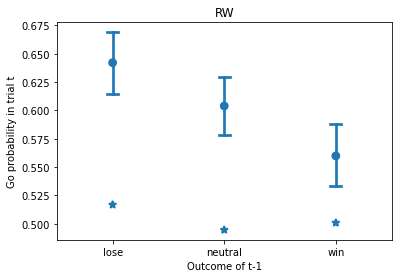

In [32]:
from matplotlib.pyplot import errorbar


participant_parameters = pd.read_csv("Modeling results data/first_llba.csv")
all_dfs = []

for i,row in participant_parameters.iterrows():
    df = run_experiment(bandit, n_runs=30, params={'alpha': row.alpha, 'beta': row.beta, 'noise': 0, 'bias': 0, 'Pav': 0}, beta2=False)
    df_subject = pd.DataFrame()
    a = df
    a['outcome_before'] = a.reward.shift(1)
    df_subject['go_prob'] = a.groupby('outcome_before').apply(calc_go_prob)
    df_subject = df_subject.reset_index()
    df_subject['mturkID'] = row.mturkID
    all_dfs.append(df_subject)
datafram_go_prob_pun = pd.concat(all_dfs)




datafram_go_prob_pun = datafram_go_prob_pun.replace({"outcome_before": outcome_descriptive})

ax = sns.pointplot(x="outcome_before", y="go_prob",
                data= datafram_go_prob_pun,
                ci = None,
                markers= "*",
                join= False
                ) 
ax = sns.pointplot(
                    # data=datafram_go_prob_pun,
                    data= first_experiment_goprob_df,
                     x="outcome_before", y="go_prob",
                     errorbar=('ci', 95),
                    join=False, 
                    capsize=.1,
                    legend=True)

ax.set(
    # ylim=(0, 0.7),
    xlabel="Outcome of t-1", 
    ylabel = "Go probability in trial t", 
    title = model_dict['llba'])
plt.show()
    

# llbax

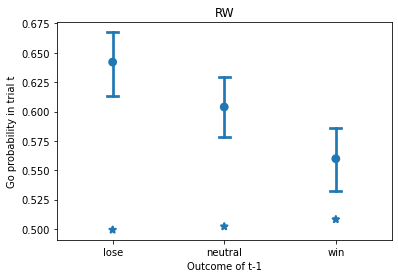

In [33]:
participant_parameters = pd.read_csv("Modeling results data/first_llbax.csv")
all_dfs = []

for i,row in participant_parameters.iterrows():
    df = run_experiment(bandit, n_runs=30, params={'alpha': row.alpha, 'beta': row.beta, 'noise': row.noise, 'bias': 0, 'Pav': 0}, beta2=False)
    df_subject = pd.DataFrame()
    a = df
    a['outcome_before'] = a.reward.shift(1)
    df_subject['go_prob'] = a.groupby('outcome_before').apply(calc_go_prob)
    df_subject = df_subject.reset_index()
    df_subject['mturkID'] = row.mturkID
    all_dfs.append(df_subject)
datafram_go_prob_pun = pd.concat(all_dfs)


ax = sns.pointplot(x="outcome_before", y="go_prob",
                data= datafram_go_prob_pun,
                ci = None,
                markers= "*",
                join= False
                ) 
ax = sns.pointplot(
                    # data=datafram_go_prob_pun,
                    data= first_experiment_goprob_df,
                     x="outcome_before", y="go_prob",
                     errorbar=('ci', 95),
                    join=False, 
                    capsize=.1,
                    legend=True)

ax.set(
    # ylim=(0, 0.7),
    xlabel="Outcome of t-1", 
    ylabel = "Go probability in trial t", 
    title = model_dict['llba'])
plt.show()


# llbaxb

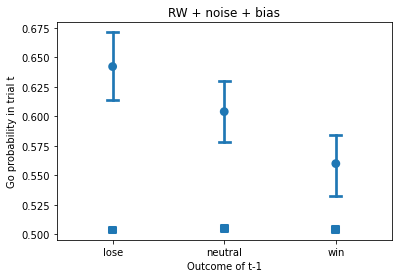

In [85]:
participant_parameters = pd.read_csv("Modeling results data/first_llbaxb.csv")
all_dfs = []

for i,row in participant_parameters.iterrows():
    df_subject = pd.DataFrame()
    df_subject_each_trial = 0
    for i in range(10):

        df = run_experiment(bandit, n_runs=30, params={'alpha': row.alpha, 'beta': row.beta, 'noise': row.noise, 'bias': row.bias, 'Pav': 0}, beta2=False)
        a = df
        a['outcome_before'] = a.reward.shift(1)
        df_subject_each_trial += a.groupby('outcome_before').apply(calc_go_prob)/10
    
    df_subject['go_prob'] = df_subject_each_trial
    df_subject = df_subject.reset_index()
    df_subject['mturkID'] = row.mturkID
    all_dfs.append(df_subject)
datafram_go_prob_punـllbaxb = pd.concat(all_dfs)

datafram_go_prob_punـllbaxb['data_gen_source'] = model_dict['llbaxb']

ax = sns.pointplot(x="outcome_before", y="go_prob",
                data= datafram_go_prob_pun,
                ci = None,
                markers= "s",
                join= False
                ) 
ax = sns.pointplot(
                    # data=datafram_go_prob_pun,
                    data= first_experiment_goprob_df,
                     x="outcome_before", y="go_prob",
                     errorbar=('ci', 95),
                    join=False, 
                    capsize=.1,
                    legend=True)

ax.set(
    # ylim=(0, 0.7),
    xlabel="Outcome of t-1", 
    ylabel = "Go probability in trial t", 
    title = model_dict['llbaxb'])
plt.show()
    

# llbaepxb

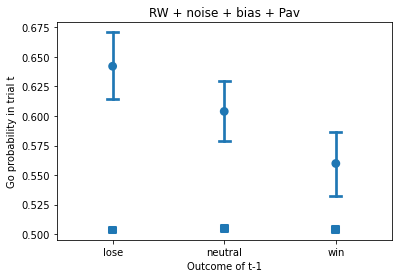

In [86]:
participant_parameters = pd.read_csv("Modeling results data/first_llbaepxb.csv")
all_dfs = []

for i,row in participant_parameters.iterrows():
    df_subject = pd.DataFrame()
    df_subject_each_trial = 0
    for i in range(10):

        df = run_experiment(bandit, n_runs=30, params={'alpha': row.alpha, 'beta': row.beta, 'noise': row.noise, 'bias': row.bias, 'Pav': row.pav}, beta2=False)
        a = df
        a['outcome_before'] = a.reward.shift(1)
        df_subject_each_trial += a.groupby('outcome_before').apply(calc_go_prob)/10
    
    df_subject['go_prob'] = df_subject_each_trial
    df_subject = df_subject.reset_index()
    df_subject['mturkID'] = row.mturkID
    all_dfs.append(df_subject)
datafram_go_prob_punـllbaepxb = pd.concat(all_dfs)

datafram_go_prob_punـllbaepxb['data_gen_source'] = model_dict['llbaepxb']


ax = sns.pointplot(x="outcome_before", y="go_prob",
                data= datafram_go_prob_pun,
                ci = None,
                markers= "s",
                join= False
                ) 
ax = sns.pointplot(
                    # data=datafram_go_prob_pun,
                    data= first_experiment_goprob_df,
                     x="outcome_before", y="go_prob",
                     errorbar=('ci', 95),
                    join=False, 
                    capsize=.1,
                    legend=True)

ax.set(
    # ylim=(0, 0.7),
    xlabel="Outcome of t-1", 
    ylabel = "Go probability in trial t", 
    title = model_dict['llbaepxb'])
plt.show()
    

# ll2baxb

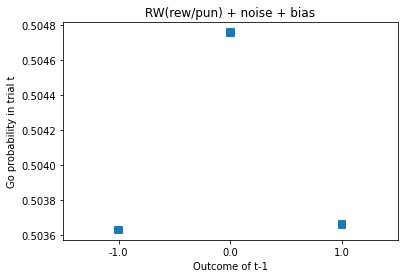

In [87]:
participant_parameters = pd.read_csv("Modeling results data/first_ll2baxb.csv")
all_dfs = []

for i,row in participant_parameters.iterrows():
    df_subject = pd.DataFrame()
    df_subject_each_trial = 0
    for i in range(10):

        df = run_experiment(bandit, n_runs=30, params={'alpha': row.alpha, 'beta_rew': row.beta_rew, 'beta_pun': row.beta_pun, 'noise': row.noise, 'bias': row.bias, 'Pav': 0}, beta2=True)
        a = df
        a['outcome_before'] = a.reward.shift(1)
        df_subject_each_trial += a.groupby('outcome_before').apply(calc_go_prob)/10
    
    df_subject['go_prob'] = df_subject_each_trial
    df_subject = df_subject.reset_index()
    df_subject['mturkID'] = row.mturkID
    all_dfs.append(df_subject)
datafram_go_prob_pun_ll2baxb = pd.concat(all_dfs)

datafram_go_prob_pun_ll2baxb['data_gen_source'] = model_dict['ll2baxb']

ax = sns.pointplot(x="outcome_before", y="go_prob",
                data= datafram_go_prob_pun,
                ci = None,
                markers= "s",
                join= False
                ) 


ax.set(
    # ylim=(0, 0.7),
    xlabel="Outcome of t-1", 
    ylabel = "Go probability in trial t", 
    title = model_dict['ll2baxb'])
plt.show()
    

# ll2baepxb

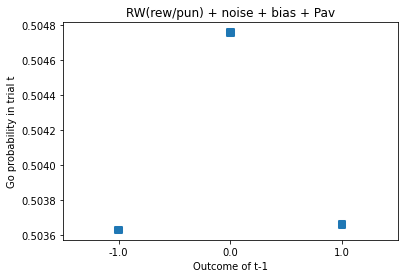

In [88]:
participant_parameters = pd.read_csv("Modeling results data/first_ll2baepxb.csv")
all_dfs = []

for i,row in participant_parameters.iterrows():
    df_subject = pd.DataFrame()
    df_subject_each_trial = 0
    for i in range(50):

        df = run_experiment(bandit, n_runs=30, params={'alpha': row.alpha, 'beta_rew': row.beta_rew, 'beta_pun': row.beta_pun, 'noise': row.noise, 'bias': row.bias, 'Pav': row.pav}, beta2=True)
        a = df
        a['outcome_before'] = a.reward.shift(1)
        df_subject_each_trial += a.groupby('outcome_before').apply(calc_go_prob)/50
    
    df_subject['go_prob'] = df_subject_each_trial
    df_subject = df_subject.reset_index()
    df_subject['mturkID'] = row.mturkID
    all_dfs.append(df_subject)
datafram_go_prob_pun_ll2baepxb = pd.concat(all_dfs)
datafram_go_prob_pun_ll2baepxb['data_gen_source'] = model_dict['ll2baepxb']

ax = sns.pointplot(x="outcome_before", y="go_prob",
                data= datafram_go_prob_pun,
                ci = None,
                markers= "s",
                join= False
                ) 

ax.set(
    # ylim=(0, 0.7),
    xlabel="Outcome of t-1", 
    ylabel = "Go probability in trial t", 
    title = model_dict['ll2baepxb'])
plt.show()

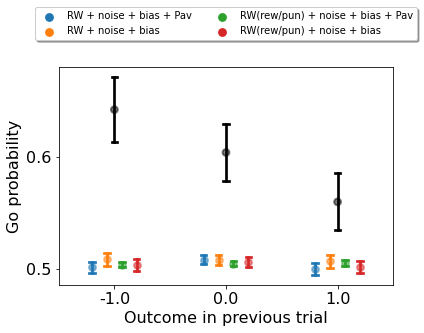

In [125]:
from cProfile import label
from operator import le

from matplotlib.pyplot import legend

first_experiment_goprob_df['data_gen_source'] = 'Behavioral'

all_df_models_and_behavioral = pd.concat([
                                            # first_experiment_goprob_df,
                                            datafram_go_prob_punـllbaepxb,
                                            datafram_go_prob_punـllbaxb, 
                                            datafram_go_prob_pun_ll2baepxb,
                                            datafram_go_prob_pun_ll2baxb]
                                            )

ax = sns.pointplot(
                    data= first_experiment_goprob_df,
                     x="outcome_before", y="go_prob",
                     errorbar=('ci', 95),
                    join=False, 
                    color= 'black',

                    capsize=.05,dodge=0.4, 
                    label = 'Behavioral Data',
                    legend=True)

ax = sns.pointplot(
                    data= all_df_models_and_behavioral,
                     x="outcome_before", y="go_prob", hue = 'data_gen_source',
                     errorbar=('ci', 95),
                    join=False, 
                    capsize=.05,dodge=0.4, label = 'Behavioral Data',
                    legend=True)






ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=2, fancybox=True, shadow=True)


ax.yaxis.set_major_locator(plt.MaxNLocator(2))
ax.tick_params(labelsize= 16 )

ax.set_xlabel("Outcome in previous trial",fontsize = 16)
ax.set_ylabel("Go probability", fontsize = 16)
plt.setp(ax.collections, alpha=.5) #for the markers
# plt.legend()
plt.show()


In [104]:
all_df_models_and_behavioral

,outcome_before,go_prob,mturkID,data_gen_source
0,-1.0,0.566667,A10BH9PYCYUKDJ,Behavioral
1,0.0,0.574074,A10BH9PYCYUKDJ,Behavioral
2,1.0,0.285714,A10BH9PYCYUKDJ,Behavioral
3,-1.0,0.807692,A10JXOU89D5RXR,Behavioral
4,0.0,0.746269,A10JXOU89D5RXR,Behavioral
...,...,...,...,...
1,0.0,0.498527,AZ69TBTDH7AZS,RW(rew/pun) + noise + bias
2,1.0,0.490193,AZ69TBTDH7AZS,RW(rew/pun) + noise + bias
0,-1.0,0.508118,AZCGSVDT79E6X,RW(rew/pun) + noise + bias
1,0.0,0.510077,AZCGSVDT79E6X,RW(rew/pun) + noise + bias
